# 2.Prophet

A traditional approach to checking its results, a.k.a. ARIMA, attacks one type of series called temporal series, which is not stationary.

## 2.1. Introduction

A traditional approach to checking its results, a.k.a. ARIMA, attacks one type of series called temporal series, which is not stationary.

This type of series does not show regularity, such as the behavior of a CPU. It is the typical manner of stock options, a measure of earth shake, etc.

My goal is to use the Prophet model, which is based on Machine Learning, to predict the future values of stock options; in this case, I have chosen Nubank. Let's start.

2.2. Theoretical review
2.3. Method
2.4. Results

## 3. Modules

### 3.1. Enhance the visualization

In [ ]:
!pip install IPython
!pip install --upgrade nbformat
!pip install yfinance # it will help to load the stock options from Exchange
!pip install pandas
!pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
!pip install plotly

### 3.2. Load de modules

In [22]:
import IPython
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

### 3.3. Load the stocks and his stock exchange 

In [4]:
# Define o símbolo da ação do Nubank
ticker = "NU"

# Baixa os dados históricos da ação
dados = yf.download(ticker, start="2021-12-06", end="2024-12-09")

# Cria um DataFrame com os dados baixados
df_nu = pd.DataFrame(dados)

# Converter a coluna 'Date' para datetime e remover as horas
df_nu.index = pd.to_datetime(df_nu.index)
df_nu.index = df_nu.index.date

# Exibe o DataFrame
print(df_nu)

## Save the data to a CSV file
df_nu.to_csv(f'{ticker}_historical_data_end_20241209.csv')

[*********************100%***********************]  1 of 1 completed

Price      Adj Close  Close   High    Low   Open    Volume
Ticker            NU     NU     NU     NU     NU        NU
2021-12-09    $10.33 $10.33 $12.24 $10.01 $11.25  90160800
2021-12-10    $11.85 $11.85 $11.85  $9.80 $11.45  50077300
2021-12-13    $10.81 $10.81 $11.29 $10.31 $11.10  19658400
2021-12-14     $9.92  $9.92 $10.58  $9.27 $10.55  22728100
2021-12-15    $10.01 $10.01 $10.29  $9.42  $9.63  12663900
...              ...    ...    ...    ...    ...       ...
2024-12-02    $12.00 $12.00 $12.22 $11.55 $12.13  95210300
2024-12-03    $11.67 $11.67 $12.14 $11.66 $12.04  58206100
2024-12-04    $12.00 $12.00 $12.14 $11.48 $11.69  45918100
2024-12-05    $11.96 $11.96 $12.28 $11.94 $12.09  37547800
2024-12-06    $12.03 $12.03 $12.04 $11.73 $11.98  33500300

[753 rows x 6 columns]


### 3.4. Read the CSV com Pandas

In [5]:
df_nu = pd.read_csv('NU_historical_data_end_20241209.csv')
df_nu

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NU,NU,NU,NU,NU,NU
1,2021-12-09,10.329999923706055,10.329999923706055,12.239999771118164,10.010000228881836,11.25,90160800
2,2021-12-10,11.850000381469727,11.850000381469727,11.850000381469727,9.800000190734863,11.449999809265137,50077300
3,2021-12-13,10.8100004196167,10.8100004196167,11.289999961853027,10.3100004196167,11.100000381469727,19658400
4,2021-12-14,9.920000076293945,9.920000076293945,10.579999923706055,9.270000457763672,10.550000190734863,22728100
...,...,...,...,...,...,...,...
749,2024-12-02,12.0,12.0,12.220000267028809,11.550000190734863,12.130000114440918,95210300
750,2024-12-03,11.670000076293945,11.670000076293945,12.140000343322754,11.65999984741211,12.039999961853027,58206100
751,2024-12-04,12.0,12.0,12.135000228881836,11.475000381469727,11.6899995803833,45918100
752,2024-12-05,11.960000038146973,11.960000038146973,12.28499984741211,11.9399995803833,12.09000015258789,37547800


### 3.5. Delete the row 0

In [6]:
df1 = df_nu.drop([0])
df1

,Price,Adj Close,Close,High,Low,Open,Volume
1,2021-12-09,10.329999923706055,10.329999923706055,12.239999771118164,10.010000228881836,11.25,90160800
2,2021-12-10,11.850000381469727,11.850000381469727,11.850000381469727,9.800000190734863,11.449999809265137,50077300
3,2021-12-13,10.8100004196167,10.8100004196167,11.289999961853027,10.3100004196167,11.100000381469727,19658400
4,2021-12-14,9.920000076293945,9.920000076293945,10.579999923706055,9.270000457763672,10.550000190734863,22728100
5,2021-12-15,10.010000228881836,10.010000228881836,10.289999961853027,9.420000076293945,9.630000114440918,12663900
...,...,...,...,...,...,...,...
749,2024-12-02,12.0,12.0,12.220000267028809,11.550000190734863,12.130000114440918,95210300
750,2024-12-03,11.670000076293945,11.670000076293945,12.140000343322754,11.65999984741211,12.039999961853027,58206100
751,2024-12-04,12.0,12.0,12.135000228881836,11.475000381469727,11.6899995803833,45918100
752,2024-12-05,11.960000038146973,11.960000038146973,12.28499984741211,11.9399995803833,12.09000015258789,37547800


### 3.5. In this example I will focus in Open price

In [7]:
df = df1.drop(columns=['Adj Close', 'Close','High','Low','Volume'])
df

,Price,Open
1,2021-12-09,11.25
2,2021-12-10,11.449999809265137
3,2021-12-13,11.100000381469727
4,2021-12-14,10.550000190734863
5,2021-12-15,9.630000114440918
...,...,...
749,2024-12-02,12.130000114440918
750,2024-12-03,12.039999961853027
751,2024-12-04,11.6899995803833
752,2024-12-05,12.09000015258789


### 3.6. Rename the name of vectors to standard that Prophet knows

In [8]:
df = df.rename(columns={'Price':'ds','Open':'y'})
df

,ds,y
1,2021-12-09,11.25
2,2021-12-10,11.449999809265137
3,2021-12-13,11.100000381469727
4,2021-12-14,10.550000190734863
5,2021-12-15,9.630000114440918
...,...,...
749,2024-12-02,12.130000114440918
750,2024-12-03,12.039999961853027
751,2024-12-04,11.6899995803833
752,2024-12-05,12.09000015258789


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 1 to 753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      753 non-null    object
 1   y       753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


### 3.7. Check if returns number of missing values in the dataset.

In [10]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [12]:
df.head()

,ds,y
1,2021-12-09,11.25
2,2021-12-10,11.449999809265137
3,2021-12-13,11.100000381469727
4,2021-12-14,10.550000190734863
5,2021-12-15,9.630000114440918


In [13]:
df.tail()

,ds,y
749,2024-12-02,12.130000114440918
750,2024-12-03,12.039999961853027
751,2024-12-04,11.6899995803833
752,2024-12-05,12.09000015258789
753,2024-12-06,11.979999542236328


### 3.8. Plot with interaction effect

Here, we can see that forecasting future values is very difficult without knowledge of some statistical/probabilistic technical aspect.

In [14]:
# plot the open price

x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of Nubank Open Price",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

### 3.9. Using Prophet

The Prophet's proposal is precisely that: simplify it so that anyone with a minimum knowledge of time series can predict future values through Machine Learning.

In [16]:
# Basic prediction

m = Prophet()
m.fit(df)

19:55:16 - cmdstanpy - INFO - Chain [1] start processing
19:55:17 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
768,2024-12-22
769,2024-12-23
770,2024-12-24
771,2024-12-25
772,2024-12-26


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-12-09,$10.14,$9.32,$10.87
1,2021-12-10,$10.11,$9.32,$10.91
2,2021-12-13,$9.97,$9.20,$10.78
3,2021-12-14,$9.95,$9.19,$10.71
4,2021-12-15,$9.92,$9.13,$10.71


#### 3.9.1. Description

`yhat`: predict value

`yhat_lower`: minimum predict value

`yhat_upper`: maximum predict value

{'whiskers': [<matplotlib.lines.Line2D at 0x16c9d27e0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c9fa840>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c9d2330>],
 'medians': [<matplotlib.lines.Line2D at 0x16c9faf00>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c9fb1d0>],
 'means': []}

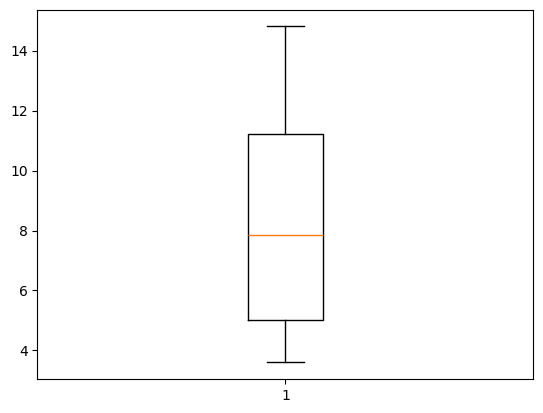

In [23]:
plt.boxplot(forecast['yhat'])

In [24]:
print(forecast['yhat'].describe())

count   $773.00
mean      $8.21
std       $3.40
min       $3.60
25%       $5.00
50%       $7.86
75%      $11.23
max      $14.81
Name: yhat, dtype: float64


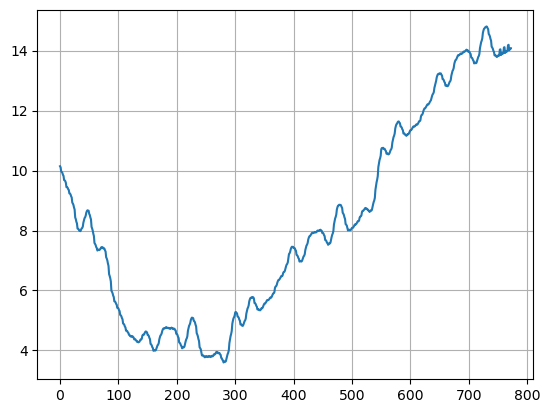

In [25]:
plt.plot(forecast['yhat'])
plt.grid()

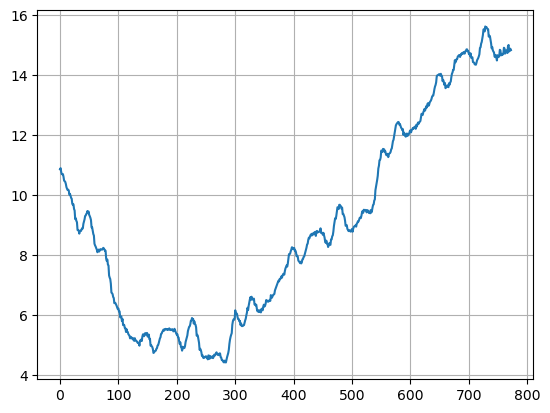

In [26]:
plt.plot(forecast['yhat_upper'])
plt.grid()

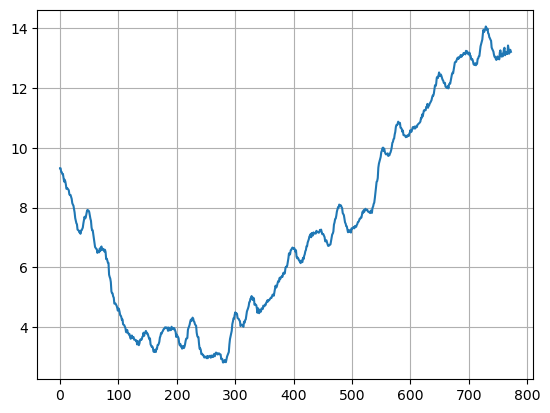

In [27]:
plt.plot(forecast['yhat_lower'])
plt.grid()

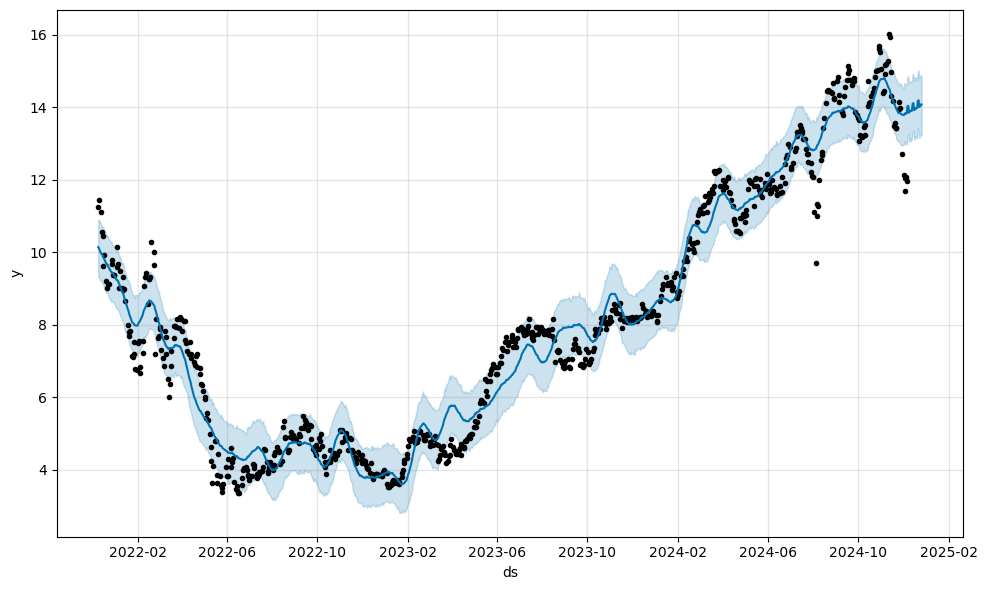

In [29]:
fig1 = m.plot(forecast)

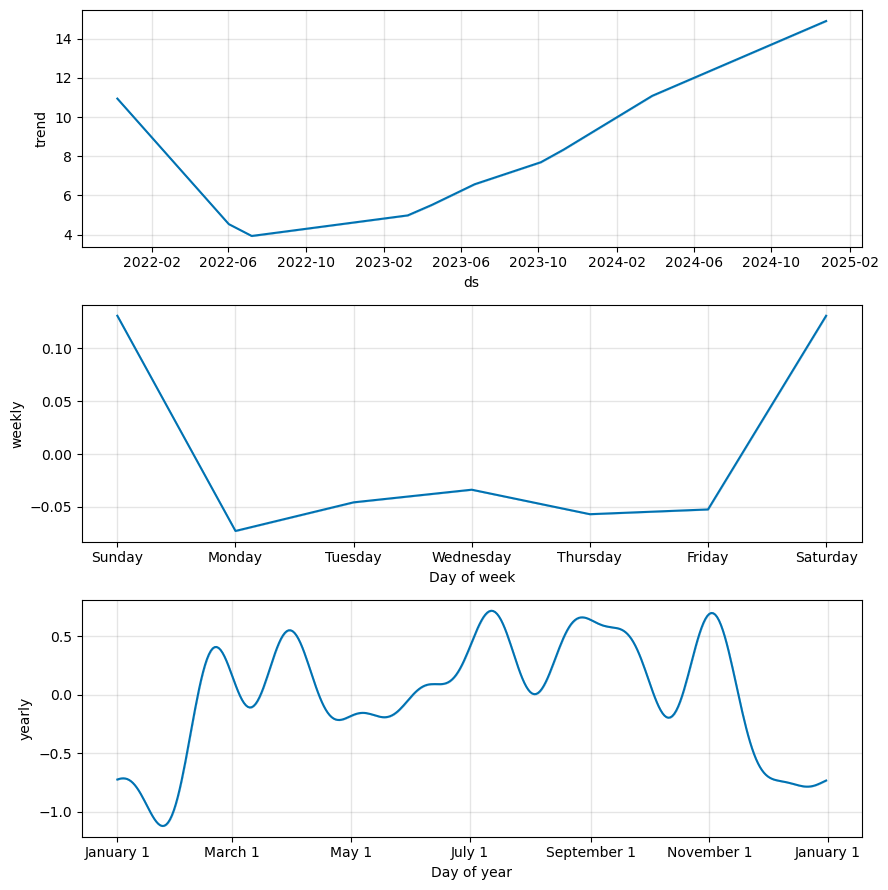

In [30]:
fig2 = m.plot_components(forecast)

### Interative Plot

In [32]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [33]:
plot_components_plotly(m, forecast)

In [ ]:
## Sort from higher values to lower values with respective dates

prediction_sorted = forecast.sort_values(by=['yhat'], ascending=False)
print(prediction_sorted[['ds','yhat']])

            ds   yhat
730 2024-11-05 $14.81
731 2024-11-06 $14.80
729 2024-11-04 $14.79
728 2024-11-01 $14.78
732 2024-11-07 $14.75
..         ...    ...
284 2023-01-27  $3.64
282 2023-01-25  $3.63
283 2023-01-26  $3.62
281 2023-01-24  $3.62
280 2023-01-23  $3.60

[773 rows x 2 columns]


In [52]:
prediction_sorted_by_date = forecast.sort_values(by=['ds'], ascending=True)


In [53]:
prediction_sorted_by_date

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-09,$10.94,$9.32,$10.87,$10.94,$10.94,$-0.80,$-0.80,$-0.80,$-0.06,$-0.06,$-0.06,$-0.74,$-0.74,$-0.74,$0.00,$0.00,$0.00,$10.14
1,2021-12-10,$10.91,$9.32,$10.91,$10.91,$10.91,$-0.80,$-0.80,$-0.80,$-0.05,$-0.05,$-0.05,$-0.75,$-0.75,$-0.75,$0.00,$0.00,$0.00,$10.11
2,2021-12-13,$10.80,$9.20,$10.78,$10.80,$10.80,$-0.83,$-0.83,$-0.83,$-0.07,$-0.07,$-0.07,$-0.76,$-0.76,$-0.76,$0.00,$0.00,$0.00,$9.97
3,2021-12-14,$10.76,$9.19,$10.71,$10.76,$10.76,$-0.81,$-0.81,$-0.81,$-0.05,$-0.05,$-0.05,$-0.76,$-0.76,$-0.76,$0.00,$0.00,$0.00,$9.95
4,2021-12-15,$10.72,$9.13,$10.71,$10.72,$10.72,$-0.80,$-0.80,$-0.80,$-0.03,$-0.03,$-0.03,$-0.77,$-0.77,$-0.77,$0.00,$0.00,$0.00,$9.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2024-12-22,$14.85,$13.32,$15.02,$14.84,$14.85,$-0.65,$-0.65,$-0.65,$0.13,$0.13,$0.13,$-0.78,$-0.78,$-0.78,$0.00,$0.00,$0.00,$14.19
769,2024-12-23,$14.86,$13.16,$14.80,$14.85,$14.87,$-0.86,$-0.86,$-0.86,$-0.07,$-0.07,$-0.07,$-0.78,$-0.78,$-0.78,$0.00,$0.00,$0.00,$14.01
770,2024-12-24,$14.88,$13.27,$14.85,$14.87,$14.89,$-0.83,$-0.83,$-0.83,$-0.05,$-0.05,$-0.05,$-0.78,$-0.78,$-0.78,$0.00,$0.00,$0.00,$14.05
771,2024-12-25,$14.89,$13.29,$14.89,$14.88,$14.90,$-0.81,$-0.81,$-0.81,$-0.03,$-0.03,$-0.03,$-0.77,$-0.77,$-0.77,$0.00,$0.00,$0.00,$14.08


In [ ]:
Leads complex, high-impact projects with full autonomy, managing outcomes, decisions, and task delegation.  
Defines priorities based on BU OKRs and long-term sustainability, translating them into measurable deliverables.  
Develops scalable solutions through operational planning and continuous iteration.  
Optimizes resources to improve efficiency in time, cost, and impact.  
Connects diverse topics and applies innovative, technology-driven problem-solving methods.

Leads complex, high-impact projects with full autonomy, managing outcomes, decisions, and task delegation.  
Defines priorities based on BU OKRs and long-term sustainability, translating them into measurable deliverables.  
Develops scalable solutions through operational planning and continuous iteration.  
Optimizes resources to improve efficiency in time, cost, and impact.  
Connects diverse topics and applies innovative, technology-driven problem-solving methods.